In [1]:
# example of gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3

# all other needed modules will be imported as they are needed. 
# I will leave them in the cell where they become relevant BUT  
# PEP8 standards require to move them at the top cell, 
# so you must move your imports in this cell for the homework

# Find data on the portal

 using DHS data on shelter population
 obtained with the following steps from the website 
 
 https://opendata.cityofnewyork.us/ -> Data 
 
 https://opendata.cityofnewyork.us/data/ -> Department of Homeless Services (DHS) (in data by agency)
 
 https://data.cityofnewyork.us/browse?Dataset-Information_Agency=Department+of+Homeless+Services+%28DHS%29
 -> DHS daily report
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m -> View Data 
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m/data -> Export
 
 this gives me various links. I copy and paste below the CSV link

# solution 1: download from the portal 



In [32]:
!curl https://data.cityofnewyork.us/api/views/hg8x-zxpr/rows.csv?accessType=DOWNLOAD > housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  730k    0  730k    0     0  1163k      0 --:--:-- --:--:-- --:--:-- 1161k


In [33]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /Users/tanyanabila/Documents/study/NYU-2018/PUI2018/PUIdata


In [34]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/Documents/study/NYU-2018/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /Users/tanyanabila/Documents/study/NYU-2018/PUI2018/PUIdata


In [35]:
# move the data
!mv housing.csv $PUIDATA

In [36]:
#test if the data is there
!ls $PUIDATA

housing.csv


## read in the data with pandas

In [37]:
#read in the data with pandas
import pandas as pd
df = pd.read_csv("%s/housing.csv"%os.getenv("PUIDATA"))

In [38]:
#print the fist 8 lines out
df.head(8)

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,51867,THE ROBESON,06/29/2018,NaN,927152.0,407,LENOX AVENUE,Manhattan,10037.0,1.019150e+09,...,32,6,0,0,0,0,79,0,79,79
1,52986,ESSIE JEFFRIES APARTMENTS HDFC.HUDMF.FY18,06/29/2018,NaN,5738.0,1990,AMSTERDAM AVENUE,Manhattan,10032.0,1.021170e+09,...,15,5,5,0,0,0,25,0,25,25
2,52986,ESSIE JEFFRIES APARTMENTS HDFC.HUDMF.FY18,06/29/2018,NaN,42862.0,531,WEST 160 STREET,Manhattan,10032.0,1.021190e+09,...,20,0,0,0,0,0,20,0,20,20
3,52986,ESSIE JEFFRIES APARTMENTS HDFC.HUDMF.FY18,06/29/2018,NaN,42869.0,547,WEST 160 STREET,Manhattan,10032.0,1.021190e+09,...,20,0,0,0,0,0,20,0,20,20
4,54377,CONFIDENTIAL,06/29/2018,NaN,NaN,----,----,Brooklyn,NaN,NaN,...,14,12,0,0,0,0,50,0,50,50
5,59107,LA CABANA HOUSES,06/29/2018,NaN,328793.0,391,LORIMER STREET,Brooklyn,11206.0,3.030310e+09,...,15,35,0,0,0,0,71,0,71,71
6,59107,LA CABANA HOUSES,06/29/2018,NaN,328801.0,417,LORIMER STREET,Brooklyn,11206.0,3.030220e+09,...,9,23,0,0,0,0,48,0,48,48
7,59107,LA CABANA HOUSES,06/29/2018,NaN,380885.0,16,TEN EYCK STREET,Brooklyn,11206.0,3.030220e+09,...,9,23,0,0,0,0,48,0,48,48


In [39]:
#print the last 3 lines out
df.tail(3)

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
3284,57341,CONFIDENTIAL,01/10/2014,01/10/2014,NaN,----,----,Staten Island,NaN,NaN,...,0,0,0,0,0,1,0,1,1,1
3285,55647,CONFIDENTIAL,01/07/2014,01/07/2014,NaN,----,----,Brooklyn,NaN,NaN,...,0,0,0,0,0,1,0,1,1,1
3286,55759,CONFIDENTIAL,01/03/2014,01/03/2014,NaN,----,----,Queens,NaN,NaN,...,0,0,0,0,0,1,0,1,1,1


In [40]:
#look at the columns available, those are the variables
df.columns

Index(['Project ID', 'Project Name', 'Project Start Date',
       'Project Completion Date', 'Building ID', 'Number', 'Street', 'Borough',
       'Postcode', 'BBL', 'BIN', 'Community Board', 'Council District',
       'Census Tract', 'NTA - Neighborhood Tabulation Area', 'Latitude',
       'Longitude', 'Latitude (Internal)', 'Longitude (Internal)',
       'Building Completion Date', 'Reporting Construction Type',
       'Extended Affordability Only', 'Prevailing Wage Status',
       'Extremely Low Income Units', 'Very Low Income Units',
       'Low Income Units', 'Moderate Income Units', 'Middle Income Units',
       'Other Income Units', 'Studio Units', '1-BR Units', '2-BR Units',
       '3-BR Units', '4-BR Units', '5-BR Units', '6-BR+ Units',
       'Unknown-BR Units', 'Counted Rental Units',
       'Counted Homeownership Units', 'All Counted Units', 'Total Units'],
      dtype='object')

In [41]:
#count how many rows, those are the data points
df.size

134767

In [42]:
#select 2 columns only for plotting
df_2c = df[['Extremely Low Income Units', 'Studio Units']]

In [43]:
df_2c.head()

,Extremely Low Income Units,Studio Units
0,0,16
1,20,0
2,6,0
3,4,0
4,1,11


## plot the data

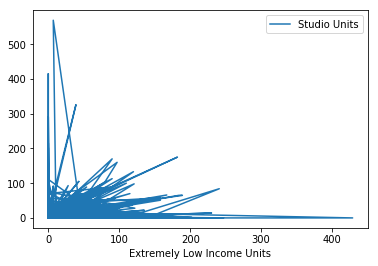

In [44]:
df_2c.plot(x="Extremely Low Income Units", y="Studio Units")

In [45]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [46]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


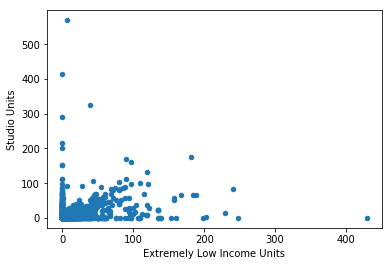

In [47]:
df_2c.plot(x="Extremely Low Income Units", y="Studio Units", kind='scatter');
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

Figure 1: Number of Studio Units in each Project against the number of Extremely Low Income Units. Note that there is no specific pattern here.  

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [19]:
url = "https://data.cityofnewyork.us/resource/q3m4-ttp3.json"

In [20]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [21]:
# print it out
df.head(3)

,_1_br_units,_2_br_units,_3_br_units,_4_br_units,_5_br_units,_6_br_units,all_counted_units,bbl,bin,borough,...,project_completion_date,project_id,project_name,project_start_date,reporting_construction_type,street_name,studio_units,total_units,unknown_br_units,very_low_income_units
0,0,9,0,0,0,0,9,1.003930e+09,1004876.0,Manhattan,...,2017-06-29T00:00:00.000,63845,LESPMHA HDFC,2017-06-29T00:00:00.000,Preservation,AVENUE B,0,9,0,5
1,1,2,0,0,0,0,3,3.034350e+09,3079751.0,Brooklyn,...,2017-10-04T00:00:00.000,65132,1238 DECATUR STREET,2014-12-17T00:00:00.000,New Construction,DECATUR STREET,0,15,0,0
2,3,3,0,0,0,0,6,3.018240e+09,3051695.0,Brooklyn,...,NaN,58589,Madison EDJ LLC,2016-06-29T00:00:00.000,Preservation,PUTNAM AVENUE,0,6,0,0


In [22]:
df.columns

Index(['_1_br_units', '_2_br_units', '_3_br_units', '_4_br_units',
       '_5_br_units', '_6_br_units', 'all_counted_units', 'bbl', 'bin',
       'borough', 'building_completion_date', 'building_id', 'census_tract',
       'community_board', 'council_district', 'counted_homeownership_units',
       'counted_rental_units', 'extended_affordability_status',
       'extremely_low_income_units', 'house_number', 'latitude',
       'latitude_internal', 'longitude', 'longitude_internal',
       'low_income_units', 'middle_income_units', 'moderate_income_units',
       'neighborhood_tabulation_area', 'other_income_units', 'postcode',
       'prevailing_wage_status', 'project_completion_date', 'project_id',
       'project_name', 'project_start_date', 'reporting_construction_type',
       'street_name', 'studio_units', 'total_units', 'unknown_br_units',
       'very_low_income_units'],
      dtype='object')

In [23]:
#now select a date and 2 variables
df_3c = df[['project_start_date', 'extremely_low_income_units', 'total_units']]

for consistency with the data above, I will change the names of the columns (variables) to be the same as before. This way the plots will come out with the same labels and legends

In [ ]:
df_3c['project_start_date']=pd.to_datetime(df_3c['project_start_date'])

In [24]:
df_3c.rename(columns = {'project_start_date':'Project Start Date', 
               'extremely_low_income_units':'Extremely Low Income Units', 
               'total_units': 'Total Units'}, inplace=True)

/Users/tanyanabila/Applications/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [25]:
df_3c.head()

,Project Start Date,Extremely Low Income Units,Total Units
0,2017-06-29T00:00:00.000,0,9
1,2014-12-17T00:00:00.000,0,15
2,2016-06-29T00:00:00.000,0,6
3,2016-06-22T00:00:00.000,135,385
4,2016-06-27T00:00:00.000,0,1


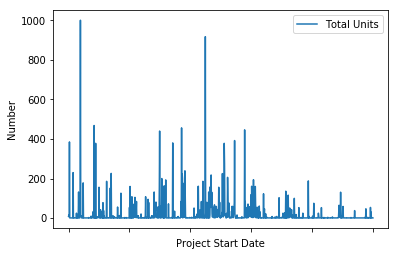

In [26]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = df_3c.plot(x='Project Start Date', y='Total Units');
ax.set_ylabel("Number");

i do not like the formatting of those dates so I will drom the timestamp overwriting the original column. 
for more info on baisc timestamp manipulation 
( no capation cause I am remaking this figure)


In [27]:
df_3c["Project Start Date"] = df_3c["Project Start Date"].apply(lambda x: pd.Timestamp(x))

/Users/tanyanabila/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


now that I am using timestamps (instead of strings as the data got read in form the json file) Pandas know to rotate the labels appropriately so I can drop rot=90

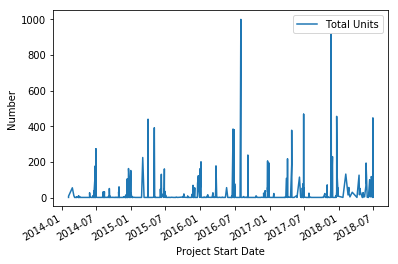

In [28]:
ax = df_3c.plot(x='Project Start Date', y='Total Units')
ax.set_ylabel("Number");

Figure 2: the total number of units, affordable and market rate, in each building from January 2014 to July 2018

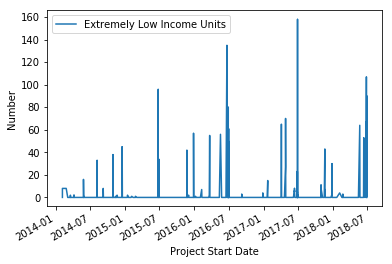

In [29]:
#plot the other columns
ax = df_3c.plot(x='Project Start Date', y='Extremely Low Income Units')
ax.set_ylabel("Number");

Figure 3: Extremely Low Income Units with rents that are affordable to households earning 0 to 30% of the area median income (AMI) from January 2014 to July 2018